### Assignment 4 - O Ring Erosion

Attributes definition:
        
     ORingAtRisk: 1. Number of O-rings at risk on a given flight
     Distressed:  2. Number experiencing thermal distress
     Temp:        3. Launch temperature (degrees F)
     PSI          4. Leak-check pressure (psi)
     FailRate     5. Percentage of O-rings that were distressed

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import statsmodels.api as sm  #import the statsmodels to do multiple lienar regression
pd.options.display.max_rows = 6 #The max row to be shown

In [2]:
df = pd.read_csv('o-ring-erosion-or-blowby.data', sep='\s+', header=None, index_col=4)
header = ['OringAtRisk','Distressed','Temp','PSI']
df.columns = header

In [3]:
del df.index.name

In [4]:
df['FailRate']= df['Distressed']/df['OringAtRisk'] #create a new attribute Failure Rate 

In [5]:
df

,OringAtRisk,Distressed,Temp,PSI,FailRate
1,6,0,66,50,0.000000
2,6,1,70,50,0.166667
3,6,0,69,50,0.000000
...,...,...,...,...,...
21,6,2,75,200,0.333333
22,6,0,76,200,0.000000
23,6,1,58,200,0.166667


Text(0.5,0,'PSI')

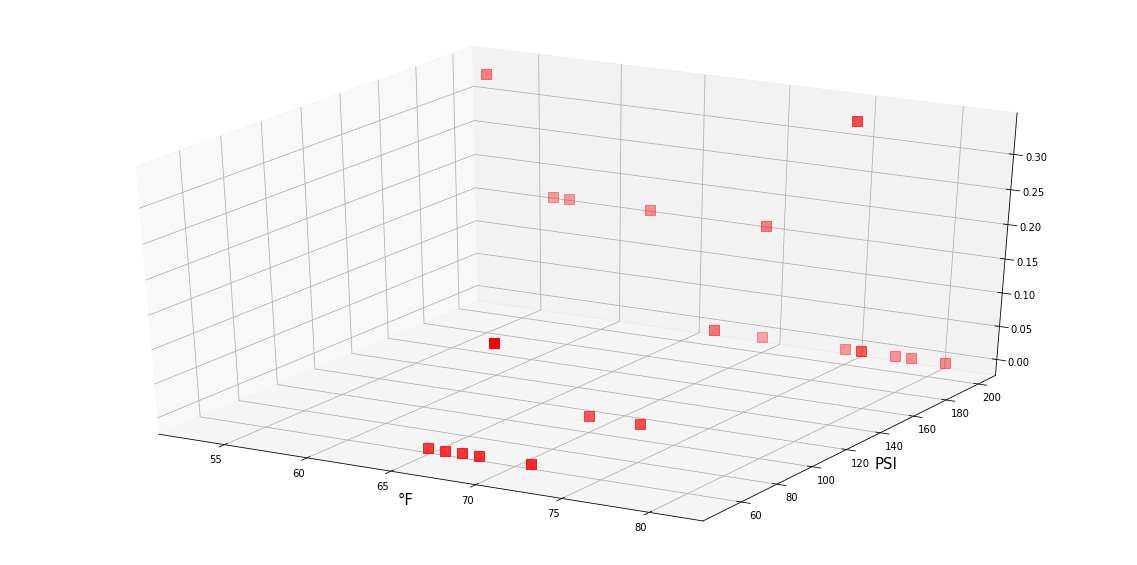

In [6]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection='3d')
z = df.FailRate
x = df.Temp
y = df.PSI
ax.scatter(x, y, z, c='r', marker='s',s=100)
ax.set_xlabel(u'\xb0F',fontsize=15)
ax.set_ylabel('PSI',fontsize=15)

In [7]:
df['Ones'] = 1
X = df[['Temp','PSI','Ones']]
y = df.FailRate
result = sm.OLS( y, X ).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               FailRate   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     5.490
Date:                Tue, 11 Dec 2018   Prob (F-statistic):             0.0126
Time:                        08:56:17   Log-Likelihood:                 23.802
No. Observations:                  23   AIC:                            -41.60
Df Residuals:                      20   BIC:                            -38.20
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Temp          -0.0081      0.003     -2.910      0.009      -0.014      -0.002
PSI            0.0005      0.000      1.699      0.105      -0.000       0.001
Ones           0.5550      0.198      2.803      0.011       0.142       0.968
==============================================================================
Omnibus:                       19.324   Durbin-Watson:                   2.390
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.471
Skew:                           1.782   Prob(JB):                     8.00e-06
Kurtosis:                       6.433   Cond. No.                     1.84e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

𝑦=−0.0081𝑥1+0.0005𝑥2+0.5550

X1: Temp X2:PSI

#### Now let's generate the dataframe for regression prediction model

In [8]:
Test=pd.DataFrame([[31]*4,[0,50,100,200],[1]*4]).T
Test.columns = ['Temp','PSI','ONES']
Test.index = ['0','50','100','200']
Test.index.name = 'Trial'
Test

,Temp,PSI,ONES
Trial,,,
0,31,0,1
50,31,50,1
100,31,100,1
200,31,200,1


#### How many O-rings does the model predict will show erosion or blowby when the temperature is 31 degrees F?  (We don’t know how much pressure the rings will experience at liftoff so do predictions at 0, 50, 100 and 200 PSI to see what difference it makes.)

In [10]:
TotalORing = 12
result.predict(Test)* TotalORing

Trial
0      3.642054
50     3.935986
100    4.229919
200    4.817784
dtype: float64